# Week 2: Linear Regression

## Optimization

In [1]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 2.41 s, sys: 651 ms, total: 3.06 s
Wall time: 3.06 s


In [2]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*self.x+1
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [13]:
ds = Data()

In [4]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
criterion = nn.MSELoss()

In [6]:
loader = DataLoader(dataset=ds, batch_size=1)

In [7]:
model = LR(1,1)

In [8]:
from torch import nn, optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [14]:
cost = []
for epoch in range(100):
    total = 0
    for x,y in loader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total= total + loss.item()
    cost.append(total)

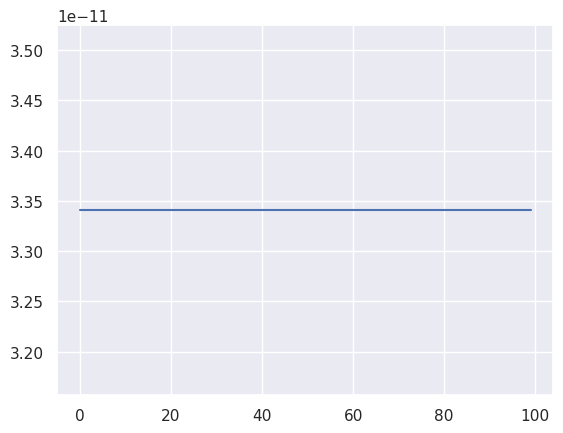

In [15]:
plt.plot(cost)
plt.show()